# 実験結果の可視化


In [28]:
import glob, json, os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
json_data = [{'index': 0, 'test': 1, 'test1': {'nest_test': 2, 'nest_test1': 3}},
             {'index': 0, 'test': 1, 'test1': {'nest_test': 2, 'nest_test1': 3}}]

with open('./results/test.json', mode='w') as f:
    json.dump(json_data, f)
json_df = pd.read_json('./results/test.json')

In [19]:
json_df['test1'].to_list()

[{'nest_test': 2, 'nest_test1': 3}, {'nest_test': 2, 'nest_test1': 3}]

In [20]:
pd.DataFrame.from_dict(json_df['test1'].to_list())

,nest_test,nest_test1
0,2,3
1,2,3


In [4]:
def show_results(path):
    folder_list = glob.glob(os.path.join(path, '*'))
    
    test_scores = []
    
    for fol in folder_list:
        
        eval_path = os.path.join(fol, 'evaluate.json')
        param_path = os.path.join(fol, 'params.json')
        
        if not os.path.exists(eval_path):
            continue
        
        with open(eval_path, mode='r') as f:
            scores = json.load(f)
            
        with open(param_path, mode='r') as f:
            params = json.load(f)
        
        params = pd.json_normalize(params).loc[0].to_dict()
        scores.update(params)
        test_scores.append(scores)
        
    return pd.DataFrame(test_scores)

In [22]:
result = show_results('./results/epoch200/')

In [23]:
result.sort_values('test_acc', ascending=False)

,test_loss,test_acc,num_blocks,patch_size,hidden_dim,tokens_mlp_dim,channels_mlp_dim,mlp_block_params.activation,mlp_block_params.dropout_rate,mlp_block_params.batch_norm,mlp_block_params.dense_params.kernel_initializer
763,0.836825,0.7305,8,2,64,64,256,gelu,0.5,False,he_normal
762,0.860045,0.7256,8,2,64,64,256,gelu,0.5,True,he_normal
916,0.830628,0.7232,24,2,64,64,64,gelu,0.5,True,he_normal
928,0.881258,0.7231,24,2,64,64,256,relu,0.5,True,he_normal
905,0.857508,0.7230,24,2,64,16,256,relu,0.5,False,he_normal
...,...,...,...,...,...,...,...,...,...,...,...
443,1.634007,0.4090,2,16,16,16,64,gelu,0.5,False,he_normal
438,1.623407,0.4065,2,16,16,16,16,relu,0.5,True,he_normal
463,1.659668,0.4002,2,16,16,64,16,relu,0.5,False,he_normal
435,1.657138,0.3987,2,16,16,16,16,gelu,0.5,False,he_normal


In [24]:
result['mlp_block_params.batch_norm'] = result['mlp_block_params.batch_norm'].astype(int)

In [29]:
?

Signature:
sns.violinplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    bw='scott',
    cut=2,
    scale='area',
    scale_hue=True,
    gridsize=100,
    width=0.8,
    inner='box',
    split=False,
    dodge=True,
    orient=None,
    linewidth=None,
    color=None,
    palette=None,
    saturation=0.75,
    ax=None,
    **kwargs,
)
Docstring:
Draw a combination of boxplot and kernel density estimate.

A violin plot plays a similar role as a box and whisker plot. It shows the
distribution of quantitative data across several levels of one (or more)
categorical variables such that those distributions can be compared. Unlike
a box plot, in which all of the plot components correspond to actual
datapoints, the violin plot features a kernel density estimation of the
underlying distribution.

This can be an effective and attractive way to show multiple distributions
of data at once, but keep in mind that the estimation procedure is
infl

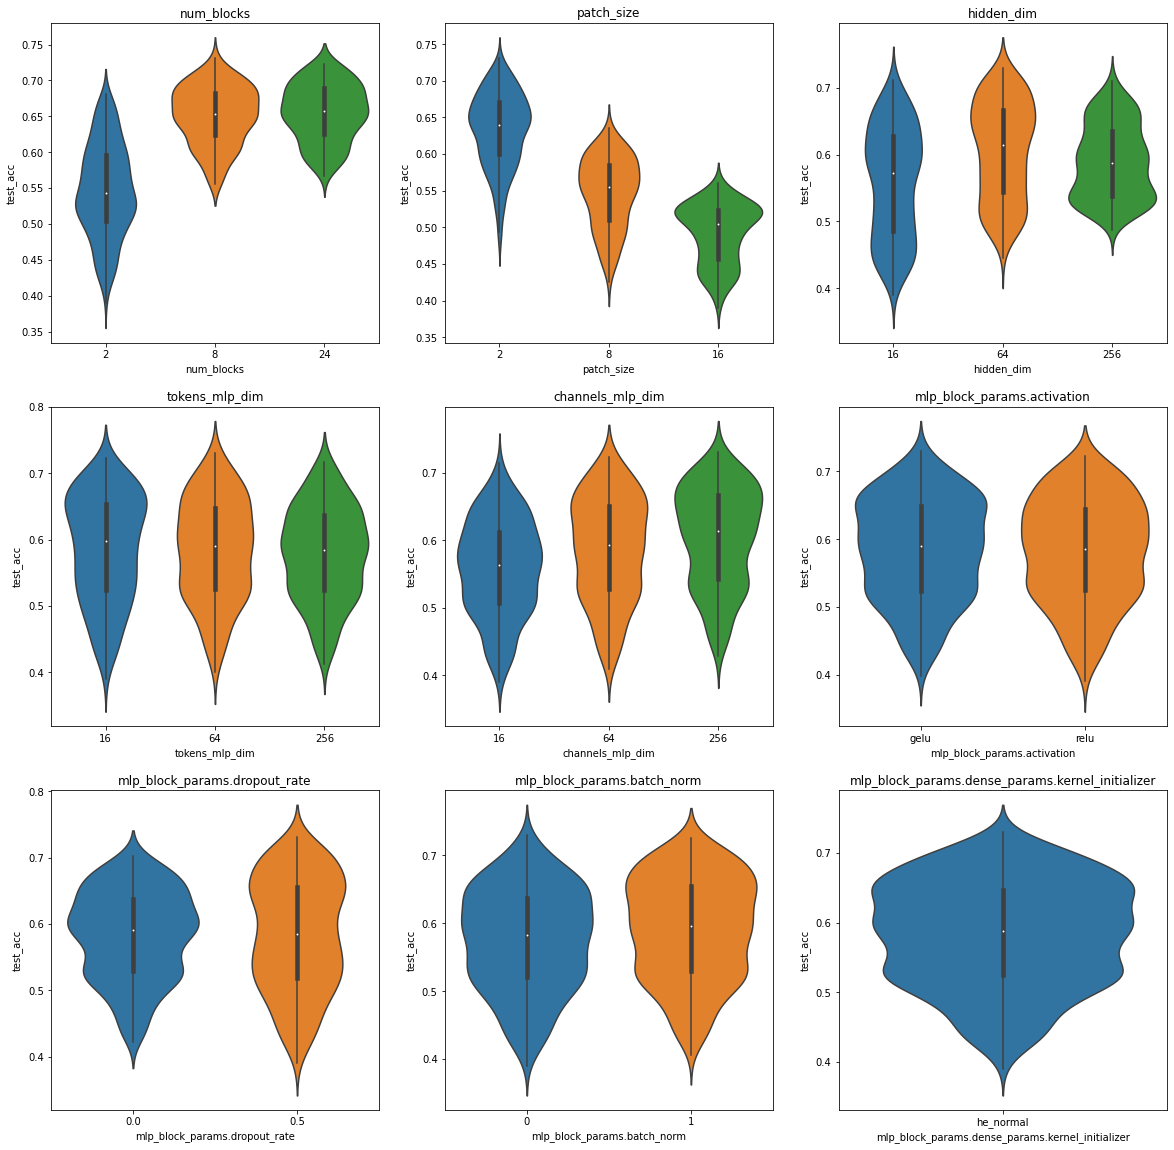

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
for i, c in enumerate(result.columns[2:]):
    ax = axes[i//3, i%3]
    sns.violinplot(data=result[['test_acc', c]], y='test_acc', x=c, ax=ax)
    ax.set_title(c)
plt.show()

In [34]:
result = show_results('./results/CUB/mlp_mixer/')

In [35]:
result.sort_values('test_acc', ascending=False)

,test_loss,test_acc,num_blocks,patch_size,hidden_dim,tokens_mlp_dim,channels_mlp_dim,mlp_block_params.activation,mlp_block_params.dropout_rate,mlp_block_params.dense_params.kernel_initializer,mlp_block_params.dense_params.kernel_regularizer
179,4.845358,0.114335,4,32,512,512,2048,gelu,0.0,he_normal,0.01
186,4.779299,0.111399,4,32,512,512,2048,relu,0.0,he_normal,0.10
187,4.773528,0.111054,4,32,512,512,2048,relu,0.0,he_normal,0.01
172,4.640666,0.110190,4,32,512,256,2048,relu,0.1,he_normal,0.10
182,4.787412,0.110017,4,32,512,512,2048,gelu,0.1,he_normal,0.10
...,...,...,...,...,...,...,...,...,...,...,...
26,4.675881,0.044387,4,8,512,512,2048,relu,0.0,he_normal,NaN
24,4.665218,0.043005,4,8,512,512,2048,relu,0.0,he_normal,NaN
22,4.696483,0.041969,4,8,512,512,2048,gelu,0.1,he_normal,NaN
12,4.683380,0.040587,4,8,512,256,2048,relu,0.1,he_normal,NaN
